<h1 align="center">Gradient Descent With AdaGrad From Scratch</h1>

Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

Estudando o maravilhoso tutorial [Machine Learning Mastery - PhD.:Jason Brownlee](https://machinelearningmastery.com/gradient-descent-with-adagrad-from-scratch/).

<font color="orange">A Descida do gradiente é um algoritmo de otimização que segue o gradiente negativo de uma função objetiva para localizar o mínimo da função.</font> Uma limitação do gradiente descendente é que ele usa o mesmo tamanho de passo (**Learning Rate**) para cada variável de entrada. Isso pode ser um problema em funções objetivas que possuem diferentes quantidades de curvatura em diferentes dimensões e, por sua vez, podem exigir um passo de tamanho diferente para um novo ponto. 

**Adaptive Gradients** , ou **AdaGrad** para abreviar, é uma extensão do algoritmo de **otimização gradiente descendente** que permite que o tamanho do passo em cada dimensão usado pelo algoritmo de otimização seja adaptado automaticamente com base nos gradientes vistos para a variável (<font color="orange">derivadas parciais</font>) vistos ao longo do curso da pesquisa.

## Gradient Descent

A descida do gradiente é um algoritmo de otimização. 

É tecnicamente referido como um algoritmo de otimização de primeira ordem, pois faz uso explicitamente da derivada de primeira ordem da função objetivo alvo.

A derivada de primeira ordem , ou simplesmente a “ derivada ”, é a taxa de variação ou inclinação da função alvo em um ponto específico, por exemplo, para uma entrada específica.

Se a função de destino tiver várias variáveis ​​de entrada, ela será referida como uma função multivariada e as variáveis ​​de entrada poderão ser consideradas como um vetor. Por sua vez, a derivada de uma função alvo multivariada também pode ser tomada como um vetor e geralmente é chamada de "gradiente".

## Adaptive Gradient (AdaGrad - Gradiente adaptável) 

O algoritmo Adaptive Gradient, ou **AdaGrad** para abreviar, é uma extensão do algoritmo de otimização de gradiente descendente.

## Gradient Descent With AdaGrad

Nesta seção, exploraremos como implementar o algoritmo de otimização de gradiente descendente com gradientes adaptativos.

## Problema de teste bidimensional

Primeiro, vamos definir uma função de otimização.

Usaremos uma função bidimensional simples que eleva ao quadrado a entrada de cada dimensão e define o intervalo de entradas válidas de $-1$$ a $1$.

A função `objective()` abaixo implementa essa função.

In [1]:
# Função objective
def objective(x, y):
    return (x**2 + y**2)
    

Podemos criar um gráfico tridimensional do conjunto de dados para ter uma ideia da curvatura da superfície de resposta.

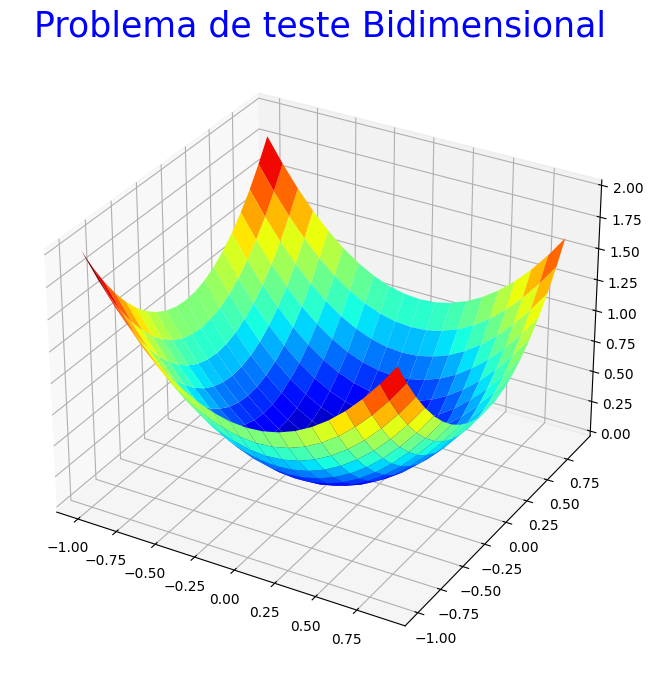

In [2]:
# Plot 3-Dimensional da função de teste
from numpy import arange
from numpy import meshgrid
import matplotlib.pyplot as plt
%matplotlib inline 


# Função objective
def objective(x, y):
    return (x**2 + y**2)
    
# Define o intervalo de entrada 
r_min, r_max = -1.0, 1.0

# Intervalo de entrada de amostra uniformemente em incrementos de 0.1
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)

# Criar uma malha a partir do eixo
x, y = meshgrid(xaxis, yaxis)

# Calcula as targets
results = objective(x, y)

# Gráfico de superfície com o esquema de cores 
figure = plt.figure(figsize=(8, 14))
axis = plt.axes(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
plt.title('Problema de teste Bidimensional', fontsize=25, c='blue')
plt.show()


Também podemos criar um gráfico bidimensional da função. Isso será útil mais tarde, quando quisermos traçar o progresso da pesquisa.

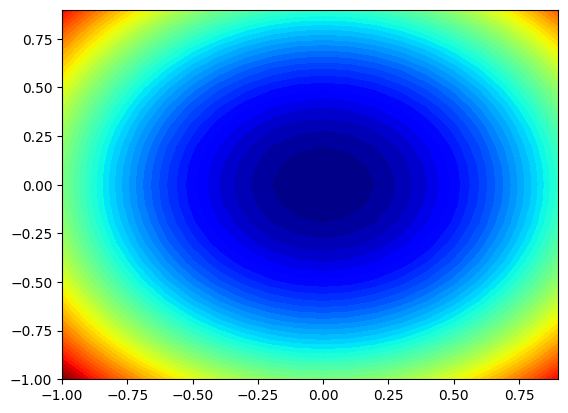

In [4]:
# contour plot of the test function
from numpy import asarray
from numpy import arange
from numpy import meshgrid
import matplotlib.pyplot as plt
%matplotlib inline


# objective function
def objective(x, y):
    return x**2.0 + y**2.0
 
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)

# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)

# compute targets
results = objective(x, y)

# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
plt.show()


## Otimização de descida de gradiente com AdaGrad

Podemos aplicar a descida de gradiente com algoritmo de gradiente adaptativo ao problema de teste.

Primeiro, precisamos de uma função que calcule a derivada dessa função.

In [8]:
from numpy import asarray

# Derivada da função objective
def derivative(x, y):
    return asarray([2*x, 2*y])
    

Em seguida, podemos implementar gradiente descendente com gradientes adaptativos.

Primeiro, podemos selecionar um ponto aleatório nos limites do problema como ponto de partida para a busca. Isso pressupõe que temos uma matriz que define os limites da pesquisa com uma linha para cada dimensão e a primeira coluna define o mínimo e a segunda coluna define o máximo da dimensão.

In [ ]:
# Gera um ponto inicial
solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])

Em seguida, precisamos inicializar a soma das derivadas parciais quadradas para cada dimensão com valores $0.0$.

In [ ]:
# Lista dos gardientes da soma de quadrados para cada variável  
sq_grad_sums = [0.0 for _ in range(bounds.shape[0])]

Podemos então enumerar um número fixo de iterações do algoritmo de otimização de busca definido por um hiperparâmetro `"n_iter"`.

In [ ]:
# Execute o Gradiente Descendente 
for it in range(n_iter):

A primeira etapa é calcular o gradiente para a solução atual usando a função `derivative()`.

In [ ]:
# Calcular Gradiente
gradient = derivative(solution[0], solution[1])

Em seguida, precisamos calcular o quadrado da derivada parcial de cada variável e adicioná-los à soma desses valores.

In [ ]:
# Atualize a soma das derivadas parciais quadradas
for i in range(gradient.shape[0]):
    sq_grad_sums[i] += gradient[i]**2.0

Podemos então usar as derivadas parciais da soma quadrada e o gradiente para calcular o próximo ponto.

Faremos isso uma variável por vez, primeiro calculando o tamanho do passo para a variável e, em seguida, o novo valor para a variável. Esses valores são construídos em uma matriz até que tenhamos uma solução completamente nova que esteja na direção de descida mais íngreme do ponto atual usando os tamanhos de etapa personalizados.

In [ ]:
# Construir uma solução uma variável de cada vez
new_solution = list()
for i in range(solution.shape[0]):
 # Calcule o tamanho do passo para esta variável
 alpha = step_size / (1e-8 + sqrt(sq_grad_sums[i]))
 # Calcule a nova posição nesta variável
 value = solution[i] - alpha * gradient[i]
 # Armazenar esta variável 
 new_solution.append(value)

Essa nova solução pode então ser avaliada usando a função `objective()` e o desempenho da pesquisa pode ser relatado.

In [ ]:
# Avaliar ponto candidato
solution = asarray(new_solution)
solution_eval = objective(solution[0], solution[1])
# Relatar o progresso
print('>%d f(%s) = %.5f' % (it, solution, solution_eval))

E é isso.

Podemos unir tudo isso em uma função chamada `adagrad()` que recebe os nomes da função `objetive` e da função `derivative`, uma matriz com os limites do domínio e valores de hiperparâmetros para o `número total de iterações` do algoritmo e `learning rate` inicial, e retorna a solução final e sua avaliação.

Esta função completa está listada abaixo

In [ ]:
# gradient descent algorithm with adagrad
def adagrad(objective, derivative, bounds, n_iter, step_size):

 # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
 # list of the sum square gradients for each variable
    sq_grad_sums = [0.0 for _ in range(bounds.shape[0])]
 # run the gradient descent
    for it in range(n_iter):
 # calculate gradient
        gradient = derivative(solution[0], solution[1])
 # update the sum of the squared partial derivatives
        for i in range(gradient.shape[0]):
            sq_grad_sums[i] += gradient[i]**2.0
 # build a solution one variable at a time
            new_solution = list()
            for i in range(solution.shape[0]):
 # calculate the step size for this variable
                alpha = step_size / (1e-8 + sqrt(sq_grad_sums[i]))
 # calculate the new position in this variable
                value = solution[i] - alpha * gradient[i]
 # store this variable
                new_solution.append(value)
 # evaluate candidate point
         solution = asarray(new_solution)
         solution_eval = objective(solution[0], solution[1])
 # report progress
 print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
 return [solution, solution_eval]

<font color="red">Observação :</font> 

usamos listas intencionalmente e estilo de codificação imperativo em vez de operações vetorizadas para facilitar a leitura. Sinta-se à vontade para adaptar a implementação a uma `implementação vetorizada` com `arrays NumPy` para melhor desempenho.

Podemos então definir nossos hiperparâmetros e chamar a função `adagrad()` para otimizar nossa função objetivo de teste.

Nesse caso, usaremos $50$ iterações do algoritmo e uma taxa de aprendizado inicial de $0.1$, ambas escolhidas após um pouco de tentativa e erro.

In [ ]:
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.1
# perform the gradient descent search with adagrad
best, score = adagrad(objective, derivative, bounds, n_iter, step_size)
print('Done!')
print('f(%s) = %f' % (best, score))

Juntando tudo isso, o exemplo completo de otimização de gradiente descendente com gradientes adaptativos está listado abaixo.

In [45]:

# gradient descent optimization with adagrad for a two-dimensional test function
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
 

# objective function
def objective(x, y):
    return x**2.0 + y**2.0
 
# derivative of objective function
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])
 
# gradient descent algorithm with adagrad
def adagrad(objective, derivative, bounds, n_iter, step_size):

# generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
# list of the sum square gradients for each variable
    sq_grad_sums = [0.0 for _ in range(bounds.shape[0])]
# run the gradient descent
    for it in range(n_iter):
# calculate gradient
        gradient = derivative(solution[0], solution[1])
# update the sum of the squared partial derivatives
        for i in range(gradient.shape[0]):
            sq_grad_sums[i] += gradient[i]**2.0
# build a solution one variable at a time
            new_solution = list()
            for i in range(solution.shape[0]):
# calculate the step size for this variable
                alpha = step_size / (1e-8 + sqrt(sq_grad_sums[i]))
# calculate the new position in this variable
                value = solution[i] - alpha * gradient[i]
# store this variable
                new_solution.append(value)
# evaluate candidate point
            solution = asarray(new_solution)
            solution_eval = objective(solution[0], solution[1])
# report progress
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return [solution, solution_eval]
 
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.1
# perform the gradient descent search with adagrad
best, score = adagrad(objective, derivative, bounds, n_iter, step_size)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([ 3.40440034e-02 -8.81297940e+06]) = 77668605852604.57812
>1 f([-6.14680548e-03 -6.81297940e+06]) = 46416688264455.21875
>2 f([ 1.10506287e-03 -6.81297926e+06]) = 46416686377702.39844
>3 f([-1.98638740e-04 -6.81297915e+06]) = 46416684833370.10156
>4 f([ 3.57058156e-05 -6.81297905e+06]) = 46416683492107.44531
>5 f([-6.41820968e-06 -6.81297896e+06]) = 46416682289724.89844
>6 f([ 1.15368924e-06 -6.81297888e+06]) = 46416681190185.38281
>7 f([-2.07378526e-07 -6.81297880e+06]) = 46416680170817.01562
>8 f([ 3.72768088e-08 -6.81297873e+06]) = 46416679216243.77344
>9 f([-6.70059960e-09 -6.81297867e+06]) = 46416678315463.12500
>10 f([ 1.20444953e-09 -6.81297860e+06]) = 46416677460277.90625
>11 f([-2.16502816e-10 -6.81297854e+06]) = 46416676644385.43750
>12 f([ 3.89169226e-11 -6.81297849e+06]) = 46416675862815.23438
>13 f([-6.99541417e-12 -6.81297843e+06]) = 46416675111564.96094
>14 f([ 1.25744319e-12 -6.81297838e+06]) = 46416674387355.07031
>15 f([-2.26028558e-13 -6.81297833e+06]) = 4641667

## Visualização do AdaGrad

Podemos traçar o progresso da busca em um gráfico de contorno do domínio.

Isso pode fornecer uma intuição para o progresso da busca ao longo das iterações do algoritmo.

Devemos atualizar a função `adagrad()` para manter uma lista de todas as soluções encontradas durante a busca, então retornar essa lista ao final da busca.

>0 f([-0.06595599  0.34064899]) = 0.12039
>1 f([-0.02902286  0.27948766]) = 0.07896
>2 f([-0.0129815   0.23463749]) = 0.05522
>3 f([-0.00582483  0.1993997 ]) = 0.03979
>4 f([-0.00261527  0.17071256]) = 0.02915
>5 f([-0.00117437  0.14686138]) = 0.02157
>6 f([-0.00052736  0.12676134]) = 0.01607
>7 f([-0.00023681  0.10966762]) = 0.01203
>8 f([-0.00010634  0.09503809]) = 0.00903
>9 f([-4.77542704e-05  8.24607972e-02]) = 0.00680
>10 f([-2.14444463e-05  7.16123835e-02]) = 0.00513
>11 f([-9.62980437e-06  6.22327049e-02]) = 0.00387
>12 f([-4.32434258e-06  5.41085063e-02]) = 0.00293
>13 f([-1.94188148e-06  4.70624414e-02]) = 0.00221
>14 f([-8.72017797e-07  4.09453989e-02]) = 0.00168
>15 f([-3.91586740e-07  3.56309531e-02]) = 0.00127
>16 f([-1.75845235e-07  3.10112252e-02]) = 0.00096
>17 f([-7.89647442e-08  2.69937139e-02]) = 0.00073
>18 f([-3.54597657e-08  2.34988084e-02]) = 0.00055
>19 f([-1.59234984e-08  2.04577993e-02]) = 0.00042
>20 f([-7.15057749e-09  1.78112581e-02]) = 0.00032
>21 f([-3.2

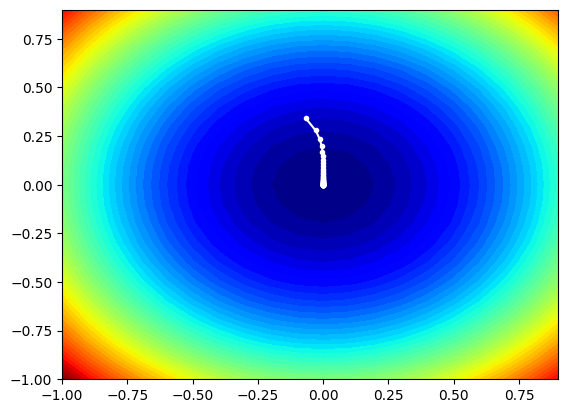

In [54]:

# example of plotting the adagrad search on a contour plot of the test function
from math import sqrt
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
 

# objective function
def objective(x, y):
    return x**2.0 + y**2.0
 
# derivative of objective function
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])
 
# gradient descent algorithm with adagrad
def adagrad(objective, derivative, bounds, n_iter, step_size):
# track all solutions
    solutions = list()
# generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
# list of the sum square gradients for each variable
    sq_grad_sums = [0.0 for _ in range(bounds.shape[0])]
# run the gradient descent
    for it in range(n_iter):
# calculate gradient
        gradient = derivative(solution[0], solution[1])
# update the sum of the squared partial derivatives
        for i in range(gradient.shape[0]):
            sq_grad_sums[i] += gradient[i]**2.0
# build solution
            new_solution = list()
            for i in range(solution.shape[0]):
# calculate the learning rate for this variable
                alpha = step_size / (1e-8 + sqrt(sq_grad_sums[i]))
# calculate the new position in this variable
                value = solution[i] - alpha * gradient[i]
                new_solution.append(value)
# store the new solution
        solution = asarray(new_solution)
        solutions.append(solution)
# evaluate candidate point
        solution_eval = objective(solution[0], solution[1])
# report progress
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return solutions
 
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions = adagrad(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()

A execução do exemplo realiza a busca como antes, exceto que neste caso, um gráfico de contorno da função `objetive` é criado e um ponto branco é mostrado para cada solução encontrada durante a busca, começando acima do ótimo e aproximando-se progressivamente do ótimo no centro da trama.